In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle


In [2]:
#imoprt data set 
dataset=pd.read_csv('wine quality.csv')

In [3]:
# no of columns in the dataset
dataset.shape

(6497, 13)

In [4]:
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
#checking fo rmissing values
dataset.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
dataset.skew()

C:\Users\Aayus\AppData\Local\Temp\ipykernel_25820\4231230252.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.skew()


fixed acidity           1.722805
volatile acidity        1.495512
citric acid             0.473032
residual sugar          1.435000
chlorides               5.399849
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386966
sulphates               1.798467
alcohol                 0.565718
quality                 0.189623
dtype: float64

In [8]:
# fill the null values 
dataset['fixed acidity'] = dataset['fixed acidity'].fillna(dataset['fixed acidity'].mean())['fixed acidity'] = dataset['fixed acidity'].fillna(dataset['fixed acidity'].mean())
dataset['volatile acidity'] = dataset['volatile acidity'].fillna(dataset['volatile acidity'].mean())['volatile acidity'] = dataset['volatile acidity'].fillna(dataset['volatile acidity'].mean())
dataset['citric acid'] = dataset['citric acid'].fillna(dataset['citric acid'].mode()[0])['citric acid'] = dataset['citric acid'].fillna(dataset['citric acid'].mode()[0])
dataset['residual sugar'] = dataset['residual sugar'].fillna(dataset['residual sugar'].mode()[0])['residual sugar'] = dataset['residual sugar'].fillna(dataset['residual sugar'].mode()[0])
dataset['chlorides'] = dataset['chlorides'].fillna(dataset['chlorides'].mean())['chlorides'] = dataset['chlorides'].fillna(dataset['chlorides'].mean())
dataset['pH'] = dataset['pH'].fillna(dataset['pH'].mean())['pH'] = dataset['pH'].fillna(dataset['pH'].mean())
dataset['sulphates'] = dataset['sulphates'].fillna(dataset['sulphates'].mean())['sulphates'] = dataset['sulphates'].fillna(dataset['sulphates'].mean())

In [9]:
#checking fo rmissing values
dataset.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318713,5.443266,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145232,4.757776,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [11]:
dataset = dataset.drop('type',axis=1)


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


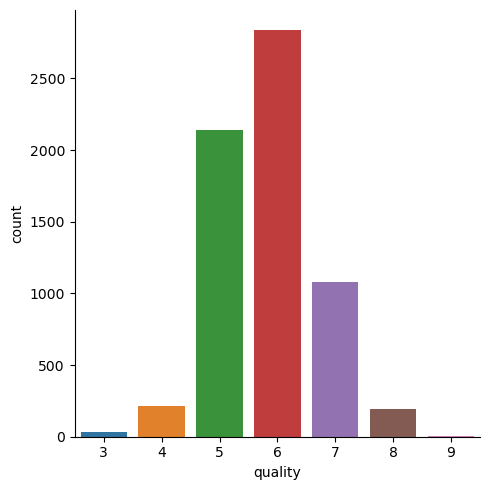

In [13]:
#number of values for each quality 
sns.catplot(x='quality',data=dataset,kind ='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

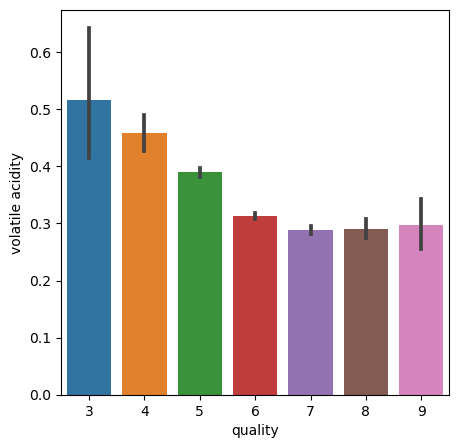

In [14]:
#volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=dataset )


<Axes: xlabel='quality', ylabel='citric acid'>

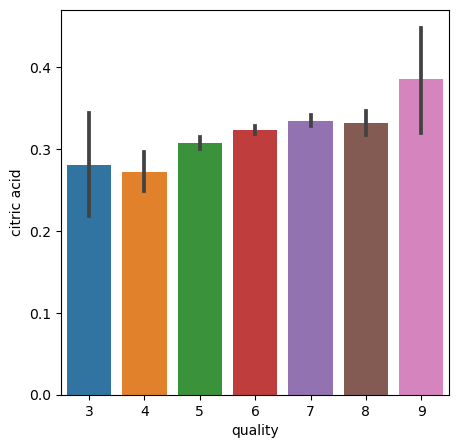

In [15]:
#volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=dataset )


<Axes: xlabel='quality', ylabel='residual sugar'>

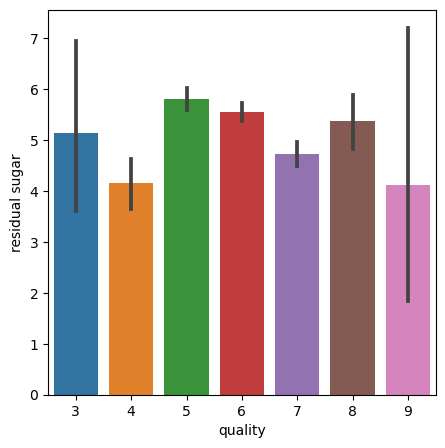

In [16]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='residual sugar',data=dataset )

<Axes: xlabel='quality', ylabel='chlorides'>

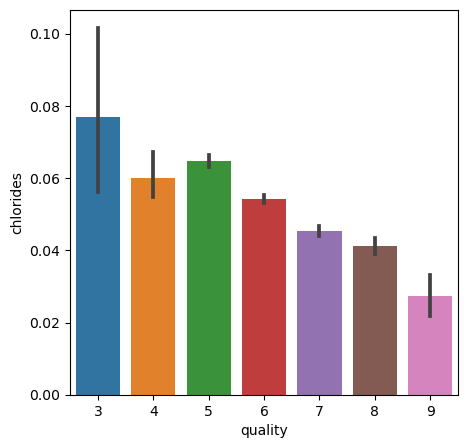

In [17]:
#volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='chlorides',data=dataset )


<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

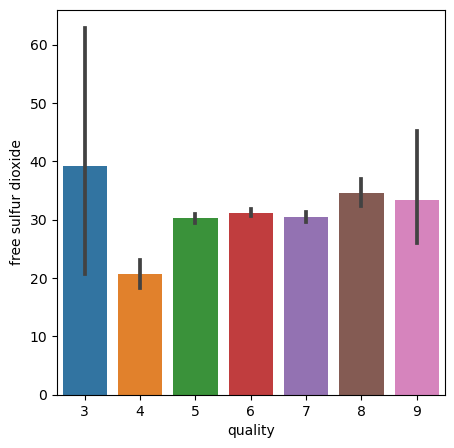

In [19]:
#volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='free sulfur dioxide',data=dataset )

In [24]:
#correlation 
# positive coorelation 
correlation = dataset.corr()


<Axes: >

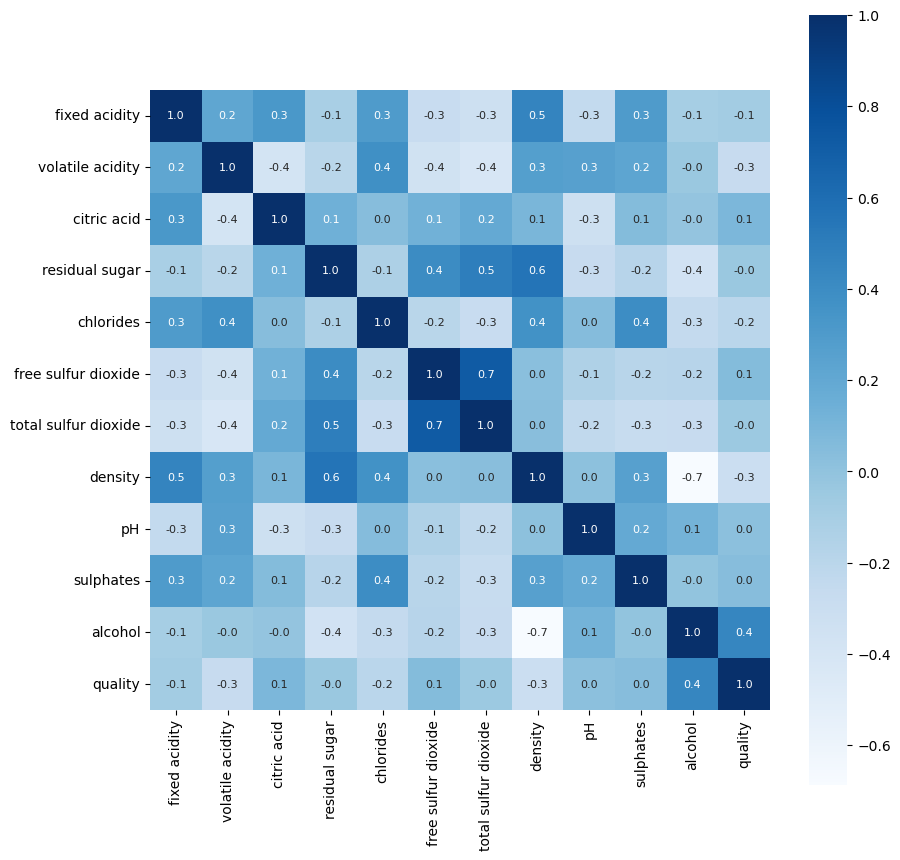

In [25]:
#constructing a heatmap to understand the correlation betwen the columns 
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar= True,square=True,fmt='.1f',annot = True,annot_kws={'size':8},cmap ='Blues' )

In [22]:
#seprate the dataset 
X= dataset.drop('quality',axis =1)

In [23]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [24]:
#label 
Y=dataset['quality']


In [25]:
# Train & test data 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [26]:
print(Y.shape,Y_train.shape,Y_test.shape)

(6497,) (5197,) (1300,)


In [36]:
#model trianing 
model = RandomForestClassifier()

In [37]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [32]:
# model evaluation 
X_test_prediction=model.predict(X_test)


In [38]:
#accuracy check
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [39]:
print("Accuracy is : ",test_data_accuracy )

Accuracy is :  0.7046153846153846


In [40]:
# Building a predictive system
input_data= (7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9)


In [41]:
input_data_as_numpy_array =np.asarray(input_data)
# reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

In [42]:
prediction = model.predict(input_data_reshaped)
print(prediction)

[6]


C:\Users\Aayus\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [39]:
# make pickle file
pickle.dump(model,open("standardScalar_1.pkl","wb"))